In [1]:
import json, os, sys

from datetime import datetime
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

import networkx as nx

from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score

project_dir = os.path.abspath("..")
if project_dir not in sys.path:
    sys.path.insert(0, project_dir)
    
import utils
import result_helper
from app.algorithms import random_walk


sns.set(style="whitegrid")

In [2]:
k = 3
n_per_cluster = 100
n_nodes = k * n_per_cluster

q = 0.1
p = 0.4 + q/np.sqrt(k)
p

0.4577350269189626

In [3]:
sizes = [n_per_cluster] * k

In [4]:
labels = [label for label, size in enumerate(sizes) for _ in range(size)]

In [5]:
num_blocks = len(sizes)

probas = [[q for s in range(num_blocks)] for r in range(num_blocks)]
for r in range(num_blocks):
    probas[r][r] = p

g = nx.stochastic_block_model(sizes=sizes, p=probas)
S = nx.to_numpy_matrix(g)

<AxesSubplot:>

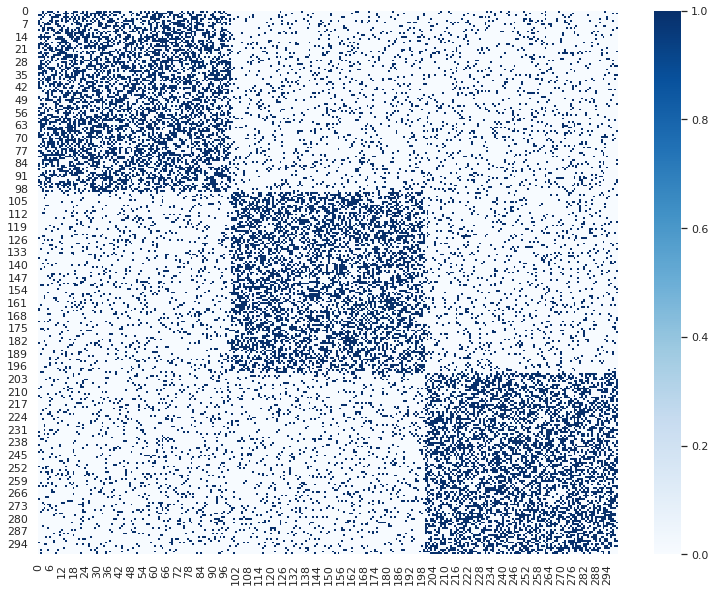

In [6]:

fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(S, cmap="Blues", ax=ax)

In [7]:
available_colors = ['red', 'green', '#efefef']
color_maps = [available_colors[label] for label in labels]

In [8]:
transition_matrix = (S / S.sum(axis=1).reshape(-1, 1)).T

In [9]:
n_points = transition_matrix.shape[0]

In [10]:
embeddings = np.zeros(shape=(n_points, n_points))

In [11]:
point_indices = np.arange(0, n_points)

In [12]:
random_walk.compute_point_embeddings(
    transition_matrix=transition_matrix,
    point_indices=point_indices,
    n_steps=1,
    embeddings=embeddings,
)

In [13]:
embeddings.shape

(300, 300)

<AxesSubplot:>

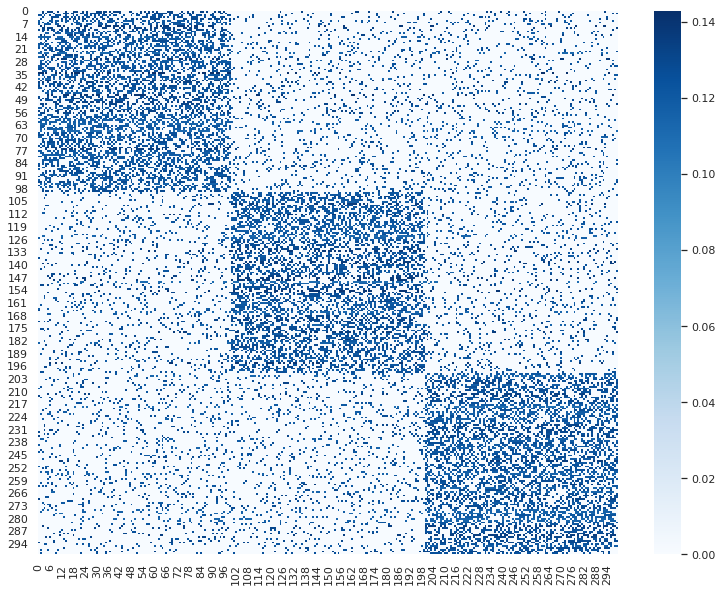

In [14]:

fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(embeddings, cmap="Blues", ax=ax)

In [15]:
n_classes = np.unique(labels).shape[0]
print(f"Running k-Means with k={n_classes}")
kmeans = KMeans(n_clusters=n_classes)
kmeans.fit(embeddings)

Running k-Means with k=3


KMeans(n_clusters=3)

In [16]:
df_results = pd.DataFrame({
    "noisy_label": labels,
    "true_label": labels,
    "cluster_label": kmeans.labels_
})

In [17]:
df_results = utils.assign_labels_based_on_clusters(
    df_results=df_results,
    new_column_name="pred_label"
)

In [18]:
df_results

,noisy_label,true_label,cluster_label,pred_label
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
295,2,2,2,2
296,2,2,2,2
297,2,2,2,2
298,2,2,2,2


In [19]:
accuracy_score(y_true=df_results["true_label"], y_pred=df_results["pred_label"])

1.0